In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect('database.sqlite') 

In [3]:
#Other tables are not relevant as they are static in time and not reflecting timeseries nature of the data 
countries = pd.read_sql_query("SELECT * from Country", connection)
matches = pd.read_sql_query("SELECT * from Match", connection)
leagues = pd.read_sql_query("SELECT * from League", connection)
teams = pd.read_sql_query("SELECT * from Team", connection)
players


In [8]:
def get_result(match):
    home = match.home_team_goal
    away = match.away_team_goal
    result = ''
    if home == away:
        result = 'D'
    elif home>away:
        result = 'H'
    else:
        result = 'A'
    return result 
    

In [9]:
matches['result'] =matches.apply(get_result, axis = 1)


In [10]:
def get_best_odds():
    matches['best_home']= matches.apply(lambda x: max(x['B365H'],x['BWH'],x['IWH'],x['LBH'],x['PSH'],x['WHH'],x['SJH'],x['VCH'],x['GBH'],x['BSH']),axis = 1)
    matches['best_draw']= matches.apply(lambda x: max(x['B365D'],x['BWD'],x['IWD'],x['LBD'],x['PSD'],x['WHD'],x['SJD'],x['VCD'],x['GBD'],x['BSD']),axis = 1)
    matches['best_away']= matches.apply(lambda x: max(x['B365A'],x['BWA'],x['IWA'],x['LBA'],x['PSA'],x['WHA'],x['SJA'],x['VCA'],x['GBA'],x['BSA']),axis = 1)

In [11]:
def get_worst_odds():
    matches['worst_home'] = matches.apply(lambda x: min(x['B365H'],x['BWH'],x['IWH'],x['LBH'],x['PSH'],x['WHH'],x['SJH'],x['VCH'],x['GBH'],x['BSH']),axis = 1)
    matches['worst_draw']= matches.apply(lambda x: min(x['B365D'],x['BWD'],x['IWD'],x['LBD'],x['PSD'],x['WHD'],x['SJD'],x['VCD'],x['GBD'],x['BSD']),axis = 1)
    matches['worst_away']= matches.apply(lambda x: min(x['B365A'],x['BWA'],x['IWA'],x['LBA'],x['PSA'],x['WHA'],x['SJA'],x['VCA'],x['GBA'],x['BSA']),axis = 1)

In [12]:
def to_datetime():
    import datetime
    #Switch the date column to datetime object 
    matches['date'] = pd.to_datetime(matches['date'])

In [13]:
get_best_odds()
get_worst_odds()
to_datetime()
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,BSH,BSD,BSA,result,best_home,best_draw,best_away,worst_home,worst_draw,worst_away
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,1.73,3.40,4.20,D,1.90,3.40,5.00,1.65,3.20,3.50
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,1.91,3.25,3.60,D,2.00,3.30,3.95,1.80,3.20,3.25
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.30,3.20,2.75,A,2.63,3.30,2.75,2.30,3.10,2.30
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,1.44,3.75,6.50,H,1.50,4.00,7.50,1.40,3.60,5.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,4.75,3.30,1.67,A,5.00,3.50,1.73,4.00,3.30,1.60
5,6,1,1,2008/2009,1,2008-09-24,492478,8203,8342,1,...,NaN,NaN,NaN,D,5.50,3.75,1.80,3.70,3.20,1.62
6,7,1,1,2008/2009,1,2008-08-16,492479,9999,8571,2,...,2.10,3.25,3.10,D,2.10,3.40,3.75,1.83,3.20,3.00
7,8,1,1,2008/2009,1,2008-08-16,492480,4049,9996,1,...,2.88,3.25,2.20,A,3.20,3.40,2.50,2.40,3.20,2.20
8,9,1,1,2008/2009,1,2008-08-16,492481,10001,9986,1,...,2.25,3.20,2.80,H,2.30,3.30,3.10,2.10,3.10,2.70
9,10,1,1,2008/2009,10,2008-11-01,492564,8342,8571,4,...,1.29,4.50,9.00,H,1.35,5.25,10.00,1.25,4.20,7.00


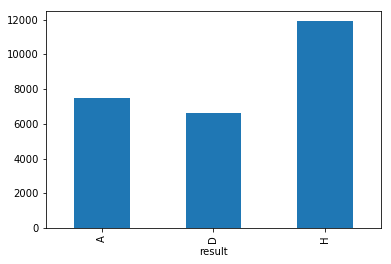

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
result = matches.groupby('result').size()
result.plot(kind = 'bar')

In [15]:
league_results = matches.groupby(['result','league_id'])

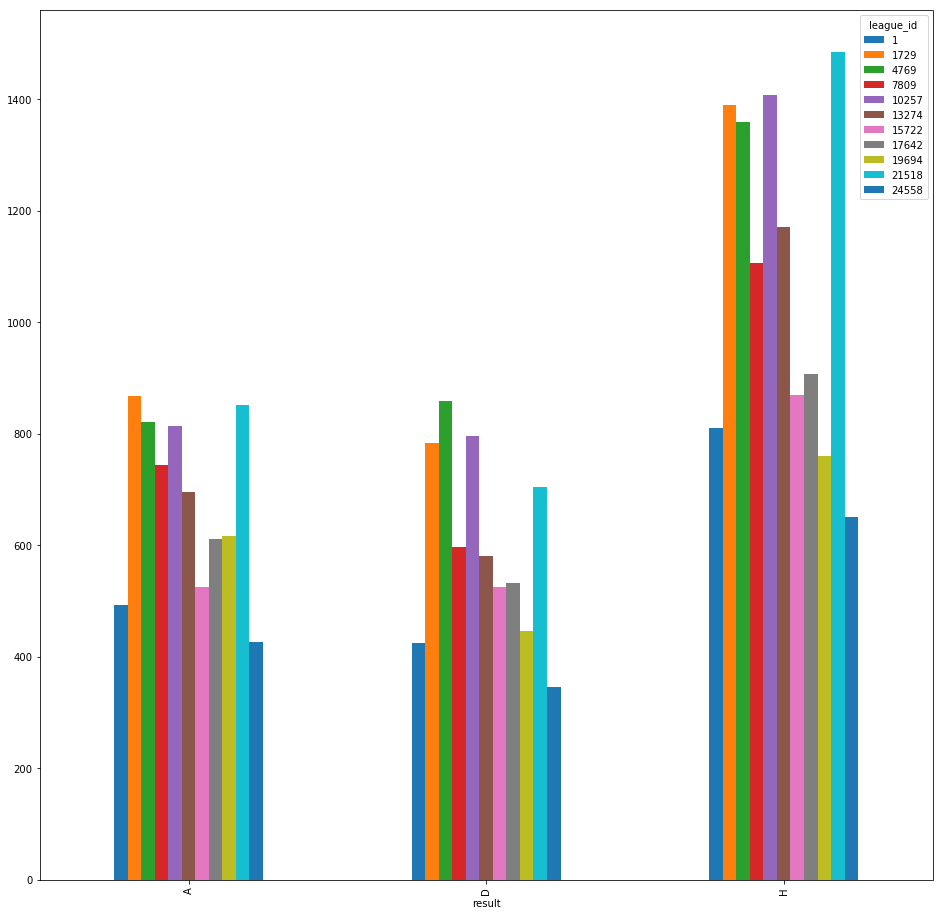

In [16]:
league_results.size().unstack().plot(kind='bar',figsize=(16,16))

In [17]:

#always betting the best odds for the home team 1 dollar per game 
matches['best_home_payout'] = matches['best_home']
matches['best_home_outcome'] = 'H'
matches.loc[~(matches.best_home_outcome==matches.result),'best_home_payout']=0
total_return_home = 100*(matches['best_home_payout'].sum()-matches['best_home_payout'].notnull().count())/matches['best_home_payout'].notnull().count()
total_return_home

-13.840313329997127

In [18]:
#always betting the best odds for the away team 1 dollar per game 
matches['best_away_payout'] = matches['best_away']
matches['best_away_outcome'] = 'A'
matches.loc[~(matches.best_away_outcome==matches.result),'best_away_payout']=0
total_return_away = 100*(matches['best_away_payout'].sum()-matches['best_away_payout'].notnull().count())/matches['best_away_payout'].notnull().count()
total_return_away

-16.870018091535123

In [19]:
#always betting the best odds for the draw 1 dollar per game 
matches['best_draw_payout'] = matches['best_draw']
matches['best_draw_outcome'] = 'D'
matches.loc[~(matches.best_draw_outcome==matches.result),'best_draw_payout']=0
total_return_draw = 100*(matches['best_draw_payout'].sum()-matches['best_draw_payout'].notnull().count())/matches['best_draw_payout'].notnull().count()
total_return_draw

-17.29862581315599

In [332]:
def get_past_matches(matches,team_id,date,n=10):
    team_matches =  matches[(matches['home_team_api_id'] == team_id) | (matches['away_team_api_id'] == team_id)]
    date = pd.to_datetime(date)
    last_matches = team_matches[team_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:n,:]
    return last_matches

In [353]:
x = get_past_matches(EPL,8456,'2014-12-19')
y = goals(x,8456)
z = goals_against(x,8456)
get_wins(x,8456)

8

In [327]:
def get_past_matches_against_team(matches, date, team1, team2, n=5 ):
    team1_home = matches[(matches['home_team_api_id'] == team1) & (matches['away_team_api_id'] == team2)]    
    team2_home = matches[(matches['home_team_api_id'] == team2) & (matches['away_team_api_id'] == team1)]  
    total_matches = pd.concat([team1_home, team2_home])
    date = pd.to_datetime(date)
    try:    
        last_matches = total_matches[total_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:n,:]
    except:
        last_matches = total_matches[total_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:total_matches.shape[0],:]
        
    return last_matches
    

In [22]:
def goals(matches, team):
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())

    total_goals = home_goals + away_goals
    
    #Return total goals
    return total_goals

In [23]:
def goals_against(matches, team):

    home_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())

    total_goals = home_goals + away_goals

    return total_goals

In [24]:
def get_wins(matches, team):
    
    home_wins = int(matches.home_team_goal[(matches.home_team_api_id == team) & (matches.home_team_goal > matches.away_team_goal)].count())
    away_wins = int(matches.away_team_goal[(matches.away_team_api_id == team) & (matches.away_team_goal > matches.home_team_goal)].count())

    total_wins = home_wins + away_wins

    return total_wins      
    

In [135]:
def get_all_bookies():
    all_bookies = {'B365','BW','IW','LB','PS','WH','SJ','VC','GB','BS'}
    return all_bookies

In [278]:
def get_odds(match,bookies):
    odds = {}
    for bookie in bookies:
        odds[bookie] = {}
        bookie_h = bookie+'H'
        bookie_a = bookie+'A'
        bookie_d = bookie+'D'        
        odds[bookie]['home'] = match[bookie_h]
        odds[bookie]['away'] = match[bookie_a]
        odds[bookie]['draw'] = match[bookie_d]
    
    return odds



In [279]:
def get_probabilities(odds):
    probs = pd.Series()
    for key in odds:
        home_prob  = 1/odds[key]['home']
        away_prob  = 1/odds[key]['away']
        draw_prob = 1/odds[key]['draw']
        total_prob = home_prob+away_prob+draw_prob
        probs.loc[key+'H'] = home_prob / total_prob
        probs.loc[key+'D'] = draw_prob / total_prob
        probs.loc[key+'A'] = away_prob / total_prob
    return probs


In [431]:
def get_result_for_merge(match):
    result = pd.Series()
    home = match.home_team_goal
    away = match.away_team_goal
    match_id = match.match_api_id
    result.loc['match_api_id'] = match_id
    if home == away:
        result.loc['result'] = 'D'
    elif home>away:
        result.loc['result'] = 'H'
    else:
        result.loc['result'] = 'A'
    return result 

In [280]:
def get_all_probs(match):
    all_bookies = get_all_bookies()
    odds = get_odds(match,all_bookies)
    probs = get_probabilities(odds)
    probs.loc['match_api_id'] = match.match_api_id
    return probs

In [367]:
def get_match_data(match,matches,n =10):
    date = match.date
    home_team = match.home_team_api_id
    away_team = match.away_team_api_id
    
    #Get last x matches of home and away team
    matches_home_team = get_past_matches(matches,home_team,date,n)
    matches_away_team = get_past_matches(matches, away_team,date,n)
    
    
    #Get last x matches of both teams against each other
    last_matches_against = get_past_matches_against_team(matches, date, home_team, away_team)
    
    
    
    
    home_goals = goals(matches_home_team, home_team)
    away_goals = goals(matches_away_team, away_team)
    home_goals_against = goals_against(matches_home_team, home_team)
    away_goals_against = goals_against(matches_away_team, away_team)

    
    data = pd.Series()
    
    
    data.loc[ 'match_api_id'] = match.match_api_id
    data.loc[ 'league_id'] = match.league_id

    data.loc['home_team_goals_difference'] = home_goals - home_goals_against
    data.loc['away_team_goals_difference'] = away_goals - away_goals_against
    data.loc['games_won_home_team'] = get_wins(matches_home_team, home_team) 
    data.loc['games_won_away_team'] = get_wins(matches_away_team, away_team)
    data.loc['games_against_won_home'] = get_wins(last_matches_against, home_team)
    data.loc['games_against_won_away'] = get_wins(last_matches_against, away_team)
    
    return data
    
   
    

In [433]:
def get_all_matches_data(matches,n =10):
    match_stats = matches.apply(lambda x: get_match_data(x, matches), axis = 1)
    
    probs = matches.apply(get_all_probs,axis = 1)
    results = matches.apply(get_result_for_merge,axis = 1)


    match_stats = pd.merge(match_stats, probs, on = 'match_api_id', how = 'left')
    match_stats = pd.merge(match_stats,results, on = 'match_api_id',how = 'left')
    
    
    
    return match_stats




In [436]:
simple_match_data =get_all_matches_data(matches) 

In [437]:
simple_match_data

,match_api_id,league_id,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won_home,games_against_won_away,IWH,IWD,...,GBH,GBD,GBA,WHH,WHD,WHA,SJH,SJD,SJA,result
0,492473,1,0,0,0,0,0,0,0.474677,0.274423,...,0.501834,0.274850,0.223316,0.524175,0.270029,0.205796,0.487625,0.280754,0.231622,D
1,492474,1,0,0,0,0,0,0,0.468032,0.277894,...,0.484833,0.275982,0.239184,0.484759,0.268821,0.246419,0.475270,0.280841,0.243889,D
2,492475,1,0,0,0,0,0,0,0.336797,0.282475,...,0.359551,0.280899,0.359551,0.355758,0.273660,0.370582,0.351004,0.279740,0.369256,A
3,492476,1,0,0,0,0,0,0,0.628019,0.225443,...,0.597826,0.239130,0.163043,0.615764,0.236453,0.147783,0.644330,0.231959,0.123711,H
4,492477,1,0,0,0,0,0,0,0.219055,0.265521,...,0.199482,0.256477,0.544041,0.212500,0.262500,0.525000,0.204630,0.263096,0.532274,A
5,492478,1,-3,4,1,2,0,0,0.237428,0.274526,...,0.201183,0.266272,0.532544,0.212500,0.262500,0.525000,0.173609,0.254626,0.571765,D
6,492479,1,0,0,0,0,0,0,0.474677,0.274423,...,0.484833,0.275982,0.239184,0.484759,0.268821,0.246419,0.477938,0.268489,0.253573,D
7,492480,1,0,0,0,0,0,0,0.363636,0.272727,...,0.320570,0.280499,0.398931,0.329949,0.274112,0.395939,0.351119,0.268503,0.380379,A
8,492481,1,0,0,0,0,0,0,0.420624,0.284939,...,0.407767,0.271845,0.320388,0.403727,0.273292,0.322981,0.420814,0.280543,0.298643,H
9,492564,1,8,-5,6,3,0,0,0.679337,0.210271,...,0.727273,0.181818,0.090909,0.660377,0.212264,0.127358,0.724113,0.183925,0.091962,H


In [438]:
simple_match_data = simple_match_data.drop('match_api_id', axis = 1)
simple_match_data

,league_id,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won_home,games_against_won_away,IWH,IWD,IWA,...,GBH,GBD,GBA,WHH,WHD,WHA,SJH,SJD,SJA,result
0,1,0,0,0,0,0,0,0.474677,0.274423,0.250901,...,0.501834,0.274850,0.223316,0.524175,0.270029,0.205796,0.487625,0.280754,0.231622,D
1,1,0,0,0,0,0,0,0.468032,0.277894,0.254074,...,0.484833,0.275982,0.239184,0.484759,0.268821,0.246419,0.475270,0.280841,0.243889,D
2,1,0,0,0,0,0,0,0.336797,0.282475,0.380727,...,0.359551,0.280899,0.359551,0.355758,0.273660,0.370582,0.351004,0.279740,0.369256,A
3,1,0,0,0,0,0,0,0.628019,0.225443,0.146538,...,0.597826,0.239130,0.163043,0.615764,0.236453,0.147783,0.644330,0.231959,0.123711,H
4,1,0,0,0,0,0,0,0.219055,0.265521,0.515424,...,0.199482,0.256477,0.544041,0.212500,0.262500,0.525000,0.204630,0.263096,0.532274,A
5,1,-3,4,1,2,0,0,0.237428,0.274526,0.488046,...,0.201183,0.266272,0.532544,0.212500,0.262500,0.525000,0.173609,0.254626,0.571765,D
6,1,0,0,0,0,0,0,0.474677,0.274423,0.250901,...,0.484833,0.275982,0.239184,0.484759,0.268821,0.246419,0.477938,0.268489,0.253573,D
7,1,0,0,0,0,0,0,0.363636,0.272727,0.363636,...,0.320570,0.280499,0.398931,0.329949,0.274112,0.395939,0.351119,0.268503,0.380379,A
8,1,0,0,0,0,0,0,0.420624,0.284939,0.294437,...,0.407767,0.271845,0.320388,0.403727,0.273292,0.322981,0.420814,0.280543,0.298643,H
9,1,8,-5,6,3,0,0,0.679337,0.210271,0.110392,...,0.727273,0.181818,0.090909,0.660377,0.212264,0.127358,0.724113,0.183925,0.091962,H


In [446]:
from sklearn.model_selection import train_test_split
result = simple_match_data.loc[:,'result']
data = simple_match_data.drop('result', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size = 0.2)

In [448]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').